Epoch 1/5
1875/1875 [==============================] - 1s 512us/step - loss: 0.6272 - accuracy: 0.7848
Epoch 2/5
1875/1875 [==============================] - 1s 514us/step - loss: 0.3861 - accuracy: 0.8612
Epoch 3/5
1875/1875 [==============================] - 1s 511us/step - loss: 0.3444 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 1s 510us/step - loss: 0.3187 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 1s 513us/step - loss: 0.2955 - accuracy: 0.8898
313/313 - 0s - loss: 0.3687 - accuracy: 0.8667
테스트 정확도: 0.8666999936103821
6
Shirt


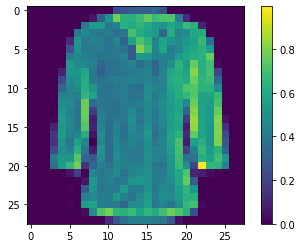

-------------------------------------------------------


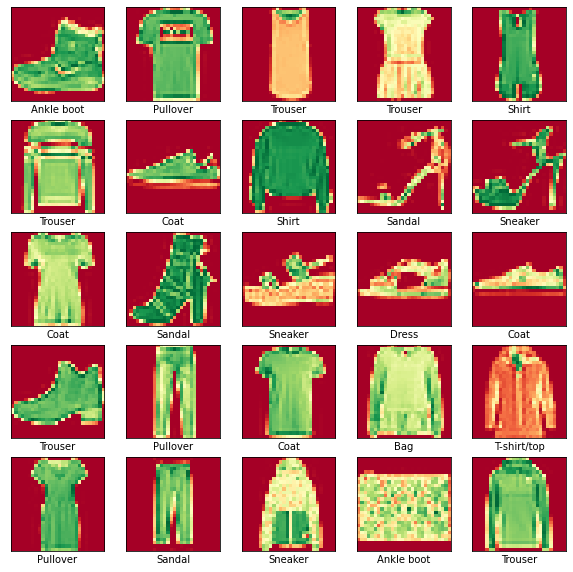

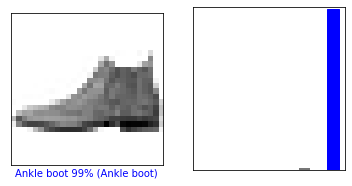

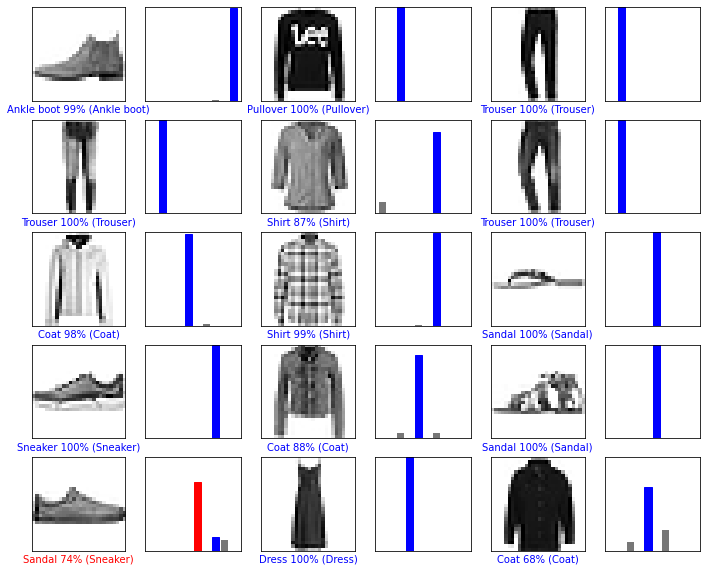

shape =  (28, 28)
shape = (1, 28, 28)
[[1.0876411e-05 3.0895208e-08 5.6646462e-07 1.5557215e-07 8.4330810e-07
  2.7900536e-03 4.7397243e-05 1.0726969e-02 4.9432265e-06 9.8641819e-01]]


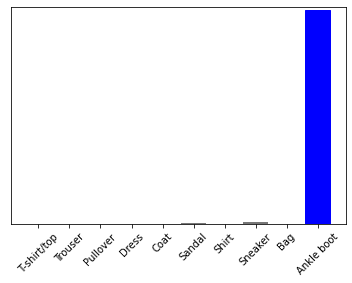

In [7]:
# 1. 라이브러리

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#2. 데이터
#    - 패션 MNIST 데이터셋
#    - 10개 범주, 70,000개의 흑백 이미지, 28*28 픽셀 

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# 3. 데이터 탐색 pass
    # train_images.shape
    # len(train_labels)
    # train_labels
    # test_images.shape
    # len(test_labels)
    
    
# 4. 데이터 전처리

train_images = train_images / 255.0
test_images = test_images / 255.0

#5. 모델 구성

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 6. 모델 훈련
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

# 7. 모델 정확도 평가

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("테스트 정확도:", test_acc)

# 8. 예측 모델 만들기
predictions = model.predict(test_images)
print(np.argmax(predictions[4]))

a = np.argmax(predictions[4])

print(class_names[a])
plt.figure()
plt.imshow(test_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

print("-------------------------------------------------------")

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # 5by 5에 어디에 넣을 것인지
    plt.xticks([])   #격자 눈금 나옴 
    plt.yticks([])
    plt.grid(False)
    # binary, rainbow, blues, autumn, RdYlGn 컬러 변경
    plt.imshow(train_images[i], cmap=plt.cm.RdYlGn)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


    
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()
    
    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.show()


#9. 배포
 #   - 새로운 이미지 사진 등록
  #  - 이미지 사진 - > 28 * 28 변환 
   # - np.array 로 변환 ( 훈련 데이터와 동일한 형식)
   # - model.predict(img)

img = test_images[0]
print("shape = ",img.shape)
img = (np.expand_dims(img,0))
print("shape =", img.shape)
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)